In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# BTC-USD

In [ ]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/BTC-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008
...,...,...,...,...,...,...,...
2347,2023-06-06,25732.109375,27313.820312,25434.867188,27238.783203,27238.783203,21929670693
2348,2023-06-07,27235.650391,27332.181641,26146.988281,26345.998047,26345.998047,19530045082
2349,2023-06-08,26347.654297,26797.513672,26246.664062,26508.216797,26508.216797,11904824295
2350,2023-06-09,26505.923828,26770.289062,26339.314453,26480.375000,26480.375000,11015551640


In [ ]:
# Xử lý dữ liệu
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna().reset_index(drop=True)

<ipython-input-6-92cf85e9732a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


## Tỉ lệ 7:2:1

In [ ]:
# Chia train, test, validate theo tỉ lệ 7:2:1
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Tiến hành huấn luyện mô hình ARIMAX
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm mô hình ARIMA tốt nhất bằng cách sử dụng auto_arima
model = auto_arima(y_train, exogenous=x_train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26619.278, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26629.632, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26623.493, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26624.529, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26628.773, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26617.325, Time=0.63 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=26617.260, Time=0.25 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=26617.943, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26621.317, Time=0.62 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26619.345, Time=2.83 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=26616.407, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=26623.821, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=26615.749, Time=1.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=26620.448, Time=1.15 sec
 ARIMA(2,1,2)(0,0,0

In [ ]:
# Fit mô hình
model.fit(y_train, exogenous=x_train)

# Kiểm tra trên tập test
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test), exogenous=x_test)

# Kiểm tra trên tập validate
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val = model.predict(n_periods=len(y_val), exogenous=x_val)

In [ ]:
# Tạo index dự đoán cho 30 ngày tiếp theo
last_index = df.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days), exogenous=x_next_30_days)

# In ra kết quả dự đoán 30 ngày
print('Predicted closing prices for the next 30 days:')
for i in range(len(y_next_30_days)):
    print(f'Day {i+1}: {y_next_30_days[i]}')


Predicted closing prices for the next 30 days:
Day 1: 35283.539900923475
Day 2: 35347.48011340158
Day 3: 35377.45958803022
Day 4: 35398.53850683298
Day 5: 35411.763972354915
Day 6: 35420.303663327075
Day 7: 35425.77671611763
Day 8: 35429.29114167917
Day 9: 35431.54674393366
Day 10: 35432.994604258194
Day 11: 35433.9239479229
Day 12: 35434.52047444768
Day 13: 35434.90337166399
Day 14: 35435.14914508158
Day 15: 35435.30690168369
Day 16: 35435.408162213454
Day 17: 35435.473159143214
Day 18: 35435.51487925764
Day 19: 35435.54165849095
Day 20: 35435.5588474979
Day 21: 35435.56988074731
Day 22: 35435.57696274994
Day 23: 35435.58150853327
Day 24: 35435.58442637265
Day 25: 35435.586299270224
Day 26: 35435.58750144241
Day 27: 35435.588273090565
Day 28: 35435.58876839472
Day 29: 35435.58908631968
Day 30: 35435.58929038879


In [ ]:
# Tính MAE
valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

# Tính toán RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)

print('Validation MAE:', valid_mae)
print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)

print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Validation MAE: 12656.098472885227
Validation RMSE: 13455.900771662618
Validation MAPE: 62.308776868773776
Testing MAE: 11399.754730068511
Testing RMSE: 13279.325489982994
Testing MAPE: 34.3941743524018


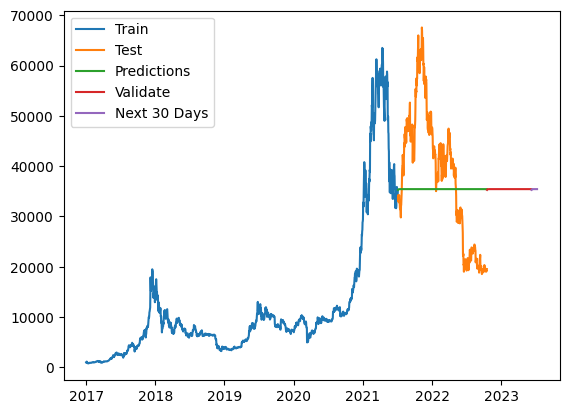

In [ ]:
# Vẽ đồ thị
plt.plot(train_data['Date'], train_data['Close'])
plt.plot(test_data['Date'], test_data['Close'])
plt.plot(test_data['Date'], y_pred)
plt.plot(val_data['Date'], y_pred_val)
plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D'), y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions', 'Validate', 'Next 30 Days'])
plt.show()


In [ ]:
test_data.index

RangeIndex(start=1646, stop=2116, step=1)

## Tỉ lệ 5:3:2

In [ ]:
# Chia train, test, validate theo tỉ lệ 5:3:2
train_size1 = int(0.5 * len(df))
test_size1 = int(0.3 * len(df))
val_size1 = len(df) - train_size1 - test_size1

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

In [ ]:
# Tiến hành huấn luyện mô hình ARIMAX
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Close'])

# Tìm mô hình ARIMA tốt nhất bằng cách sử dụng auto_arima
model = auto_arima(y_train1, exogenous=x_train1, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17268.278, Time=4.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17262.325, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17263.655, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17263.643, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17260.489, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17264.330, Time=1.30 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 6.040 seconds


In [ ]:
# Fit mô hình
model.fit(y_train1, exogenous=x_train)

# Kiểm tra trên tập test
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Close'])
y_pred1 = model.predict(n_periods=len(y_test1), exogenous=x_test1)

# Kiểm tra trên tập validate
x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1['Close'])
y_pred_val1 = model.predict(n_periods=len(y_val1), exogenous=x_val)

In [ ]:
# Tạo index dự đoán cho 30 ngày tiếp theo
last_index1 = df.index[-1]
x_next1_30_days = np.array(range(last_index1 + 1, last_index1 + 31)).reshape(-1, 1)
y_next1_30_days = model.predict(n_periods=len(x_next1_30_days), exogenous=x_next1_30_days)

# In ra kết quả dự đoán 30 ngày
print('Predicted closing prices for the next 30 days:')
for i in range(len(y_next1_30_days)):
    print(f'Day {i+1}: {y_next1_30_days[i]}')

Predicted closing prices for the next 30 days:
Day 1: 6185.06640625
Day 2: 6185.06640625
Day 3: 6185.06640625
Day 4: 6185.06640625
Day 5: 6185.06640625
Day 6: 6185.06640625
Day 7: 6185.06640625
Day 8: 6185.06640625
Day 9: 6185.06640625
Day 10: 6185.06640625
Day 11: 6185.06640625
Day 12: 6185.06640625
Day 13: 6185.06640625
Day 14: 6185.06640625
Day 15: 6185.06640625
Day 16: 6185.06640625
Day 17: 6185.06640625
Day 18: 6185.06640625
Day 19: 6185.06640625
Day 20: 6185.06640625
Day 21: 6185.06640625
Day 22: 6185.06640625
Day 23: 6185.06640625
Day 24: 6185.06640625
Day 25: 6185.06640625
Day 26: 6185.06640625
Day 27: 6185.06640625
Day 28: 6185.06640625
Day 29: 6185.06640625
Day 30: 6185.06640625


In [ ]:
# Tính toán RMSE
valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - y_val1)**2))
test_rmse1 = np.sqrt(np.mean((y_pred1 - y_test1)**2))

# Tính MAE
valid_mae1 = mean_absolute_error(y_val1, y_pred_val1)
test_mae1 = mean_absolute_error(y_test1, y_pred1)

# Tính MAPE
def mean_absolute_percentage_error(y_true1, y_pred1):
    return np.mean(np.abs((y_true1 - y_pred1) / y_true1)) * 100

valid_mape1 = mean_absolute_percentage_error(y_val1, y_pred_val1)
test_mape1 = mean_absolute_percentage_error(y_test1, y_pred1)

In [ ]:
print('Validation MAE:', valid_mae1)
print('Validation RMSE:', valid_rmse1)
print('Validation MAPE:', valid_mape1)

print('Testing MAE:', test_mae1)
print('Testing MAPE:', test_mape1)
print('Testing RMSE:', test_rmse1)

Validation MAE: 19460.487223825636
Validation RMSE: 20968.391678764958
Validation MAPE: 73.90901720123047
Testing MAE: 26371.7191122285
Testing MAPE: 68.20481234678631
Testing RMSE: 32362.812083953253


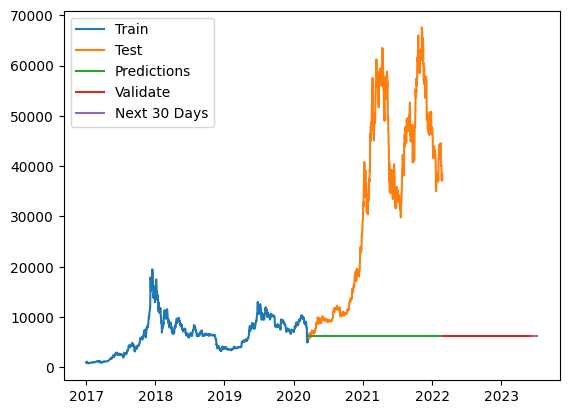

In [ ]:
# Vẽ đồ thị
plt.plot(train_data1['Date'], train_data1['Close'])
plt.plot(test_data1['Date'], test_data1['Close'])
plt.plot(test_data1['Date'], y_pred1)
plt.plot(val_data1['Date'], y_pred_val1)
plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D'), y_next1_30_days)
plt.legend(['Train', 'Test', 'Predictions', 'Validate', 'Next 30 Days'])
plt.show()


In [ ]:
test_data.index

RangeIndex(start=1646, stop=2116, step=1)

# DOGE-USD

In [ ]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/DOGE-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270
...,...,...,...,...,...,...,...
2035,2023-06-06,0.066568,0.071784,0.066112,0.070373,0.070373,428926152
2036,2023-06-07,0.070371,0.070371,0.066878,0.067300,0.067300,278793457
2037,2023-06-08,0.067302,0.068426,0.067154,0.067966,0.067966,167825308
2038,2023-06-09,0.067963,0.070920,0.067626,0.069489,0.069489,274101529


In [ ]:
# Xử lý dữ liệu
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna().reset_index(drop=True)

<ipython-input-5-92cf85e9732a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


## Tỉ lệ 7:2:1

In [ ]:
# Chia train, test, validate theo tỉ lệ 7:2:1
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Tiến hành huấn luyện mô hình ARIMAX
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm mô hình ARIMA tốt nhất bằng cách sử dụng auto_arima
model = auto_arima(y_train, exogenous=x_train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8307.530, Time=3.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8279.768, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8300.783, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8296.926, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8281.512, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8330.444, Time=9.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-8318.275, Time=3.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8301.657, Time=1.76 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-8354.706, Time=10.58 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-8356.704, Time=8.04 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-8354.668, Time=7.92 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-8362.085, Time=3.77 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-8391.345, Time=7.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-8385.451, Time=3.15 sec
 ARIMA(3,1,4)(0,0,

In [ ]:
# Fit mô hình
model.fit(y_train, exogenous=x_train)

# Kiểm tra trên tập test
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test), exogenous=x_test)

# Kiểm tra trên tập validate
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val = model.predict(n_periods=len(y_val), exogenous=x_val)

In [ ]:
# Tạo index dự đoán cho 30 ngày tiếp theo
last_index = df.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days), exogenous=x_next_30_days)

# In ra kết quả dự đoán 30 ngày
print('Predicted closing prices for the next 30 days:')
for i in range(len(y_next_30_days)):
    print(f'Day {i+1}: {y_next_30_days[i]}')


Predicted closing prices for the next 30 days:
Day 1: 0.25565682313344557
Day 2: 0.25923745979111396
Day 3: 0.2552485636124122
Day 4: 0.25431638858004413
Day 5: 0.25493612507384933
Day 6: 0.252465032447554
Day 7: 0.25223862818698817
Day 8: 0.25478863812151126
Day 9: 0.2546198432941854
Day 10: 0.25472605869298487
Day 11: 0.25639302569093153
Day 12: 0.2555207879679896
Day 13: 0.25418380783486033
Day 14: 0.25466991631339175
Day 15: 0.2541028649985926
Day 16: 0.25335692053130054
Day 17: 0.2544101955066563
Day 18: 0.25485532568015945
Day 19: 0.2545265324509729
Day 20: 0.2551550513913537
Day 21: 0.25524220296441286
Day 22: 0.2544476395474095
Day 23: 0.254466390175192
Day 24: 0.254540550468377
Day 25: 0.2540866807755559
Day 26: 0.25432471588098615
Day 27: 0.25476181057394515
Day 28: 0.2546039393601235
Day 29: 0.2547002095422947
Day 30: 0.2549205729718612


In [ ]:
# Tính MAE
valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

# Tính toán RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)

print('Validation MAE:', valid_mae)
print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)

print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Validation MAE: 0.17392712940568175
Validation RMSE: 0.17415289118213992
Validation MAPE: 219.24179145265578
Testing MAE: 0.13083999672331206
Testing RMSE: 0.14343194663945574
Testing MAPE: 156.14972981121198


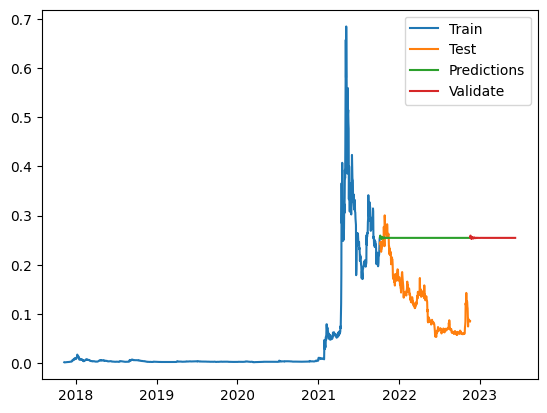

In [ ]:
# Vẽ đồ thị
plt.plot(train_data['Date'], train_data['Close'])
plt.plot(test_data['Date'], test_data['Close'])
plt.plot(test_data['Date'], y_pred)
plt.plot(val_data['Date'], y_pred_val)
# plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D'), y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions', 'Validate'])
plt.show()


In [ ]:
test_data.index

RangeIndex(start=1428, stop=1836, step=1)

## Tỉ lệ 5:3:2

In [ ]:
# Chia train, test, validate theo tỉ lệ 5:3:2
train_size1 = int(0.5 * len(df))
test_size1 = int(0.3 * len(df))
val_size1 = len(df) - train_size1 - test_size1

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

In [ ]:
# Tiến hành huấn luyện mô hình ARIMAX
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Close'])

# Tìm mô hình ARIMA tốt nhất bằng cách sử dụng auto_arima
model = auto_arima(y_train1, exogenous=x_train1, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-13497.772, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13492.261, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13509.394, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13509.729, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-13494.223, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-13507.706, Time=1.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-13507.038, Time=0.88 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-13510.698, Time=1.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-13505.538, Time=1.79 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-13506.351, Time=2.83 sec


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-13486.110, Time=1.40 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-13503.011, Time=3.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-13512.424, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-13509.011, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-13509.677, Time=0.49 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-13499.882, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-13507.509, Time=0.83 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-13511.699, Time=0.42 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-13508.330, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-13488.072, Time=0.31 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=-13504.995, Time=1.04 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0]          
Total fit time: 19.121 seconds


In [ ]:
# Fit mô hình
model.fit(y_train1, exogenous=x_train)

# Kiểm tra trên tập test
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Close'])
y_pred1 = model.predict(n_periods=len(y_test1), exogenous=x_test1)

# Kiểm tra trên tập validate
x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1['Close'])
y_pred_val1 = model.predict(n_periods=len(y_val1), exogenous=x_val)

In [ ]:
# Tạo index dự đoán cho 30 ngày tiếp theo
last_index1 = df.index[-1]
x_next1_30_days = np.array(range(last_index1 + 1, last_index1 + 31)).reshape(-1, 1)
y_next1_30_days = model.predict(n_periods=len(x_next1_30_days), exogenous=x_next1_30_days)

# In ra kết quả dự đoán 30 ngày
print('Predicted closing prices for the next 30 days:')
for i in range(len(y_next1_30_days)):
    print(f'Day {i+1}: {y_next1_30_days[i]}')

Predicted closing prices for the next 30 days:
Day 1: 0.0034217389902496684
Day 2: 0.003420030323890968
Day 3: 0.003421493611136932
Day 4: 0.0034202404644630376
Day 5: 0.0034213136485495006
Day 6: 0.0034203945828827037
Day 7: 0.0034211816628539216
Day 8: 0.003420507614302797
Day 9: 0.003421084863713133
Day 10: 0.0034205905122585128
Day 11: 0.003421013870613341
Day 12: 0.00342065131014158
Day 13: 0.0034209618038266213
Day 14: 0.0034206958996921134
Day 15: 0.0034209236177171645
Day 16: 0.0034207286019494365
Day 17: 0.003420895611783876
Day 18: 0.0034207525859910166
Day 19: 0.0034208750720559344
Day 20: 0.003420770176038236
Day 21: 0.0034208600080900403
Day 22: 0.0034207830766897034
Day 23: 0.003420848960082534
Day 24: 0.003420792538108777
Day 25: 0.003420840857404215
Day 26: 0.003420799477173143
Day 27: 0.0034208349148488804
Day 28: 0.0034208045663266726
Day 29: 0.0034208305565413535
Day 30: 0.003420808298743938


In [ ]:
# Tính MAE
valid_mae1 = mean_absolute_error(y_val1, y_pred_val1)
test_mae1 = mean_absolute_error(y_test1, y_pred1)

# Tính toán RMSE
valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - y_val1)**2))
test_rmse1 = np.sqrt(np.mean((y_pred1 - y_test1)**2))

# Tính MAPE
def mean_absolute_percentage_error(y_true1, y_pred1):
    return np.mean(np.abs((y_true1 - y_pred1) / y_true1)) * 100

valid_mape1 = mean_absolute_percentage_error(y_val1, y_pred_val1)
test_mape1 = mean_absolute_percentage_error(y_test1, y_pred1)

print('Validation MAE:', valid_mae1)
print('Validation RMSE:', valid_rmse1)
print('Validation MAPE:', valid_mape1)

print('Testing MAE:', test_mae1)
print('Testing RMSE:', test_rmse1)
print('Testing MAPE:', test_mape1)

Validation MAE: 0.07456329295293711
Validation RMSE: 0.07616511265480354
Validation MAPE: 95.46437650621846
Testing MAE: 0.14680216625290787
Testing RMSE: 0.19347193803269924
Testing MAPE: 79.66814367691518


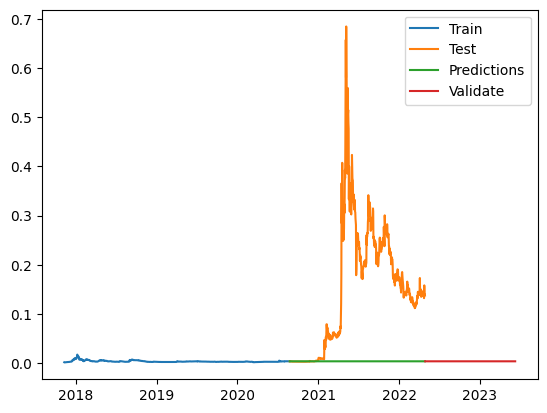

In [ ]:
# Vẽ đồ thị
plt.plot(train_data1['Date'], train_data1['Close'])
plt.plot(test_data1['Date'], test_data1['Close'])
plt.plot(test_data1['Date'], y_pred1)
plt.plot(val_data1['Date'], y_pred_val1)
# plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D'), y_next1_30_days)
plt.legend(['Train', 'Test', 'Predictions', 'Validate'])
plt.show()


In [ ]:
test_data.index

RangeIndex(start=1428, stop=1836, step=1)

# ETH-USD

In [ ]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/drive/MyDrive/HK6_2022-2023/IS403.N22.HTCL - Phân tích dữ liệu kinh doanh/IS403_Team15/Project/Dataset/ETH-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
2035,2023-06-06,1810.581421,1896.222656,1801.405273,1884.494873,1884.494873,8704411776
2036,2023-06-07,1884.372925,1893.809082,1822.303101,1832.395996,1832.395996,7919894455
2037,2023-06-08,1832.513550,1861.136108,1830.165039,1846.301880,1846.301880,4536041931
2038,2023-06-09,1846.077881,1854.824951,1828.544556,1840.225220,1840.225220,4610831509


In [ ]:
# Xử lý dữ liệu
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna().reset_index(drop=True)

<ipython-input-9-92cf85e9732a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


## Tỉ lệ 7:2:1

In [ ]:
# Chia train, test, validate theo tỉ lệ 7:2:1
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Tiến hành huấn luyện mô hình ARIMAX
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm mô hình ARIMA tốt nhất bằng cách sử dụng auto_arima
model = auto_arima(y_train, exogenous=x_train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16130.938, Time=2.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16153.011, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16138.838, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16140.988, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16152.558, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16129.822, Time=1.75 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16133.538, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16127.976, Time=2.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16133.226, Time=3.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16134.019, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=16127.720, Time=1.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=16140.873, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=16138.745, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=16132.684, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0

In [ ]:
# Fit mô hình
model.fit(y_train, exogenous=x_train)

# Kiểm tra trên tập test
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test), exogenous=x_test)

# Kiểm tra trên tập validate
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val = model.predict(n_periods=len(y_val), exogenous=x_val)

In [ ]:
# Tạo index dự đoán cho 30 ngày tiếp theo
last_index = df.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days), exogenous=x_next_30_days)

# In ra kết quả dự đoán 30 ngày
print('Predicted closing prices for the next 30 days:')
for i in range(len(y_next_30_days)):
    print(f'Day {i+1}: {y_next_30_days[i]}')


Predicted closing prices for the next 30 days:
Day 1: 3587.9505774519585
Day 2: 3582.002969465169
Day 3: 3586.7906430193925
Day 4: 3582.9366872589044
Day 5: 3586.039023881395
Day 6: 3583.5417215983953
Day 7: 3585.551986586232
Day 8: 3583.933774266149
Day 9: 3585.2363941340336
Day 10: 3584.18781818442
Day 11: 3585.03189522425
Day 12: 3584.352434619197
Day 13: 3584.8993831701396
Day 14: 3584.4591034612745
Day 15: 3584.813517458175
Day 16: 3584.528223181219
Day 17: 3584.7578778370043
Day 18: 3584.5730116648306
Day 19: 3584.721824243863
Day 20: 3584.602033892725
Day 21: 3584.6984620866256
Day 22: 3584.620839836665
Day 23: 3584.6833237788114
Day 24: 3584.6330257904365
Day 25: 3584.673514395151
Day 26: 3584.640922095445
Day 27: 3584.6671580699276
Day 28: 3584.6460387760067
Day 29: 3584.663039271872
Day 30: 3584.6493543039583


In [ ]:
# Tính toán RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

# Tính MAE
valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)

print('Validation MAE:', valid_mae)
print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)

print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Validation MAE: 1973.0590812341259
Validation RMSE: 1990.35035567023
Validation MAPE: 128.9883774240563
Testing MAE: 1303.1055702545934
Testing RMSE: 1522.8992681536165
Testing MAPE: 78.98122131884007


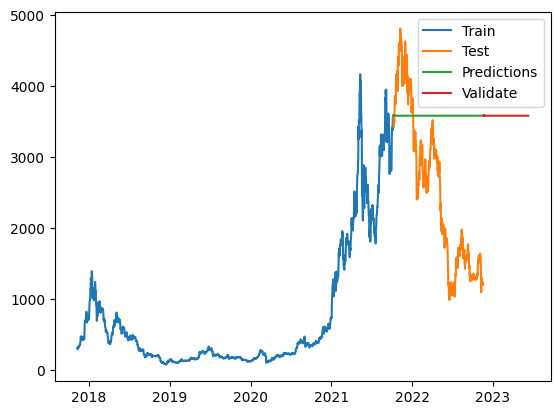

In [ ]:
# Vẽ đồ thị
plt.plot(train_data['Date'], train_data['Close'])
plt.plot(test_data['Date'], test_data['Close'])
plt.plot(test_data['Date'], y_pred)
plt.plot(val_data['Date'], y_pred_val)
# plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D'), y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions', 'Validate'])
plt.show()


In [ ]:
test_data.index

RangeIndex(start=1428, stop=1836, step=1)

## Tỉ lệ 5:3:2

In [ ]:
# Chia train, test, validate theo tỉ lệ 5:3:2
train_size1 = int(0.5 * len(df))
test_size1 = int(0.3 * len(df))
val_size1 = len(df) - train_size1 - test_size1

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

In [ ]:
# Tiến hành huấn luyện mô hình ARIMAX
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Close'])

# Tìm mô hình ARIMA tốt nhất bằng cách sử dụng auto_arima
model = auto_arima(y_train1, exogenous=x_train1, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9420.722, Time=4.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9418.650, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9418.884, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9418.879, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9416.662, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9420.878, Time=1.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 7.372 seconds


In [ ]:
# Fit mô hình
model.fit(y_train1, exogenous=x_train)

# Kiểm tra trên tập test
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Close'])
y_pred1 = model.predict(n_periods=len(y_test1), exogenous=x_test1)

# Kiểm tra trên tập validate
x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1['Close'])
y_pred_val1 = model.predict(n_periods=len(y_val1), exogenous=x_val)

In [ ]:
# Tạo index dự đoán cho 30 ngày tiếp theo
last_index1 = df.index[-1]
x_next1_30_days = np.array(range(last_index1 + 1, last_index1 + 31)).reshape(-1, 1)
y_next1_30_days = model.predict(n_periods=len(x_next1_30_days), exogenous=x_next1_30_days)

# In ra kết quả dự đoán 30 ngày
print('Predicted closing prices for the next 30 days:')
for i in range(len(y_next1_30_days)):
    print(f'Day {i+1}: {y_next1_30_days[i]}')

Predicted closing prices for the next 30 days:
Day 1: 408.1441955566406
Day 2: 408.1441955566406
Day 3: 408.1441955566406
Day 4: 408.1441955566406
Day 5: 408.1441955566406
Day 6: 408.1441955566406
Day 7: 408.1441955566406
Day 8: 408.1441955566406
Day 9: 408.1441955566406
Day 10: 408.1441955566406
Day 11: 408.1441955566406
Day 12: 408.1441955566406
Day 13: 408.1441955566406
Day 14: 408.1441955566406
Day 15: 408.1441955566406
Day 16: 408.1441955566406
Day 17: 408.1441955566406
Day 18: 408.1441955566406
Day 19: 408.1441955566406
Day 20: 408.1441955566406
Day 21: 408.1441955566406
Day 22: 408.1441955566406
Day 23: 408.1441955566406
Day 24: 408.1441955566406
Day 25: 408.1441955566406
Day 26: 408.1441955566406
Day 27: 408.1441955566406
Day 28: 408.1441955566406
Day 29: 408.1441955566406
Day 30: 408.1441955566406


In [ ]:
# Tính toán RMSE
valid_rmse1 = np.sqrt(np.mean((y_pred_val1 - y_val1)**2))
test_rmse1 = np.sqrt(np.mean((y_pred1 - y_test1)**2))
# Tính MAE
valid_mae1 = mean_absolute_error(y_val1, y_pred_val1)
test_mae1 = mean_absolute_error(y_test1, y_pred1)
# Tính MAPE
def mean_absolute_percentage_error(y_true1, y_pred1):
    return np.mean(np.abs((y_true1 - y_pred1) / y_true1)) * 100

valid_mape1 = mean_absolute_percentage_error(y_val1, y_pred_val1)
test_mape1 = mean_absolute_percentage_error(y_test1, y_pred1)


print('Validation MAE:', valid_mae1)
print('Validation RMSE:', valid_rmse1)
print('Validation MAPE:', valid_mape1)

print('Testing MAE:', test_mae1)
print('Testing RMSE:', test_rmse1)
print('Testing MAPE:', test_mape1)

Validation MAE: 1185.0120692533606
Validation RMSE: 1230.4457941142668
Validation MAPE: 73.31969347598373
Testing MAE: 1928.3613168554368
Testing RMSE: 2295.8840787996173
Testing MAPE: 69.61696594696588


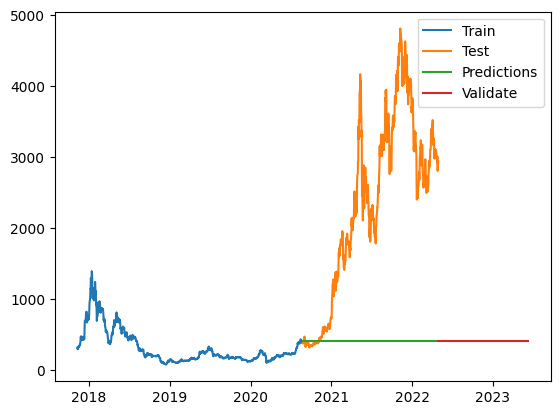

In [ ]:
# Vẽ đồ thị
plt.plot(train_data1['Date'], train_data1['Close'])
plt.plot(test_data1['Date'], test_data1['Close'])
plt.plot(test_data1['Date'], y_pred1)
plt.plot(val_data1['Date'], y_pred_val1)
# plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D'), y_next1_30_days)
plt.legend(['Train', 'Test', 'Predictions', 'Validate'])
plt.show()


In [ ]:
test_data.index

RangeIndex(start=1428, stop=1836, step=1)